__ANALYSIS OF RED WINE DATASET TO PREDICT THE QUALITY OF RED WINE AS GOOD OR BAD

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
##from statsmodel.graphics.gofplots import qqplot
from scipy.stats import zscore


__LOADING DATA SET

In [6]:
df=pd.read_csv("E:\\winequality-red.csv")
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.shape

(1599, 12)

This data set has 1599 rows and 12 coloumns

In [11]:

df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

quality feature has integer value all other feature has float value

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


The maximum value of quality is 8 and the minimum value is 3.the feature chorides has ranges from 6 to 72 and the feature total sulfur di oxide ranges from 6 to 289.These two features has large range 

__CHECKING FOR NULL VALUES AND MISSING VALUES

In [8]:

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

__UNIVARIATE ANALYSIS

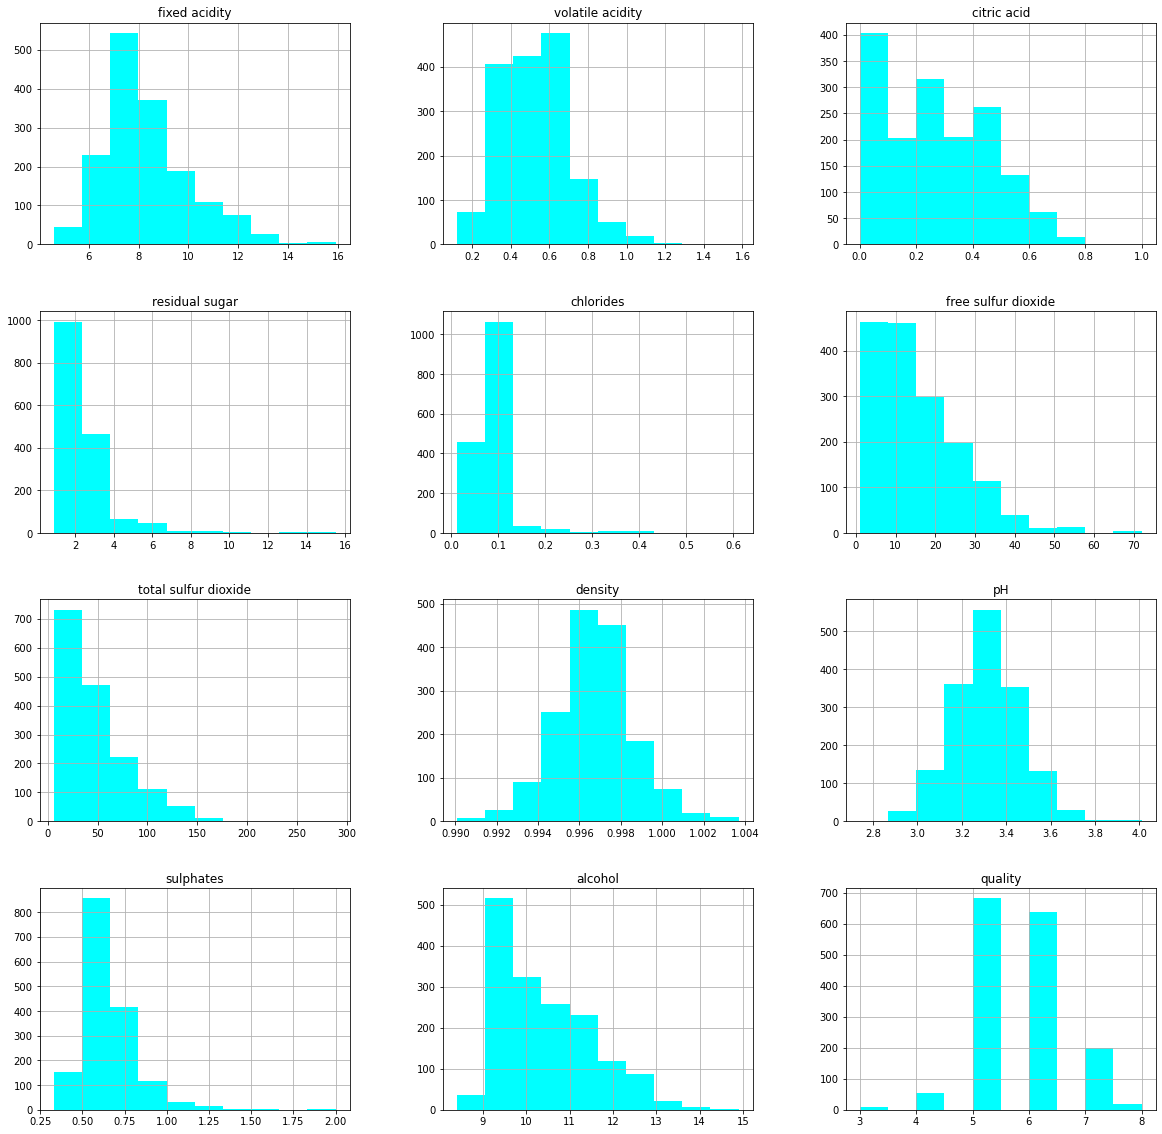

In [22]:
df.hist(bins=10, figsize=(20, 20),color=(0,1,1))
plt.show()

denisity and ph are distributed normally.Remaining features are positiveliy skewed

<AxesSubplot:xlabel='fixed acidity'>

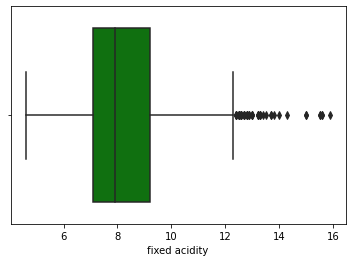

In [4]:
sns.boxplot(df['fixed acidity'],color='green')

fixed acidity has outlier

<AxesSubplot:xlabel='volatile acidity'>

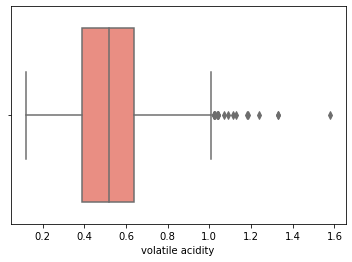

In [6]:
sns.boxplot(df['volatile acidity'],color='salmon')

<AxesSubplot:xlabel='citric acid'>

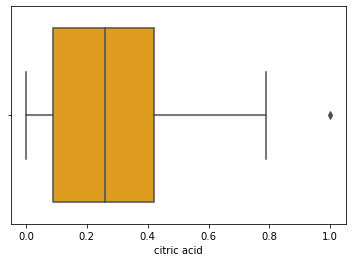

In [5]:
sns.boxplot(df['citric acid'],color='orange')

<AxesSubplot:xlabel='residual sugar'>

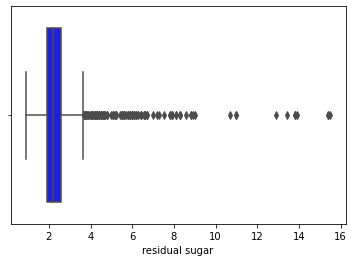

In [7]:
sns.boxplot(df['residual sugar'],color='blue')

<AxesSubplot:xlabel='free sulfur dioxide'>

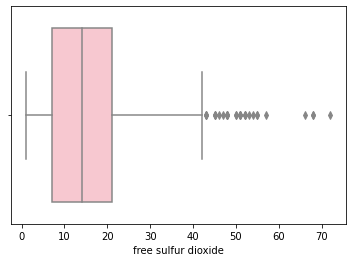

In [11]:
sns.boxplot(df['free sulfur dioxide'],color='pink')

<AxesSubplot:xlabel='chlorides'>

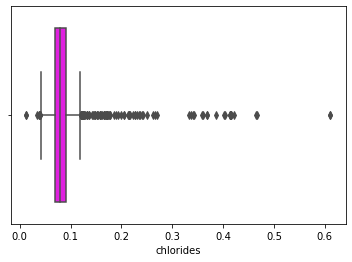

In [33]:
sns.boxplot(df['chlorides'],color=(1,0,1))

<AxesSubplot:xlabel='total sulfur dioxide'>

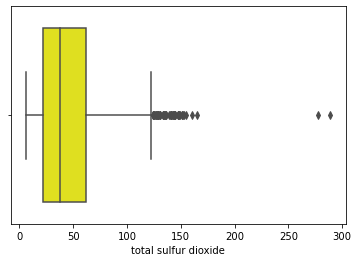

In [12]:
sns.boxplot(df['total sulfur dioxide'],color='yellow')

<AxesSubplot:xlabel='density'>

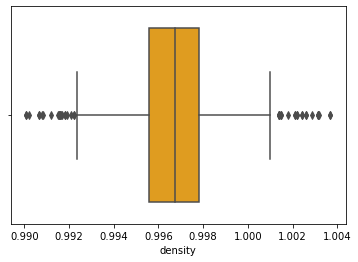

In [13]:
sns.boxplot(df['density'],color='orange')

<AxesSubplot:xlabel='sulphates'>

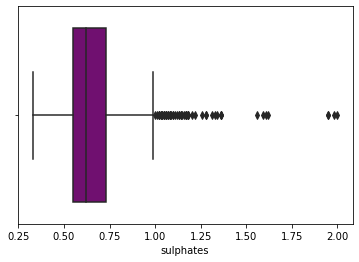

In [15]:
sns.boxplot(df['sulphates'],color='purple')

<AxesSubplot:xlabel='pH'>

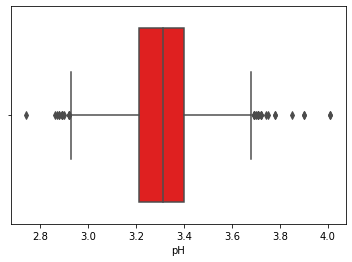

In [17]:
sns.boxplot(df['pH'],color='Red')

<AxesSubplot:xlabel='alcohol'>

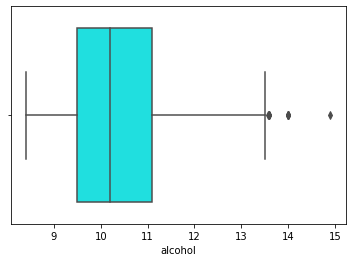

In [21]:
sns.boxplot(df['alcohol'],color=(0,1,1))

___All features are analyised induvidually using box plot,Its apparent that all the feature has outliers

__cHECKING COUNT OF QUALITY FEATURE 

<AxesSubplot:xlabel='quality', ylabel='count'>

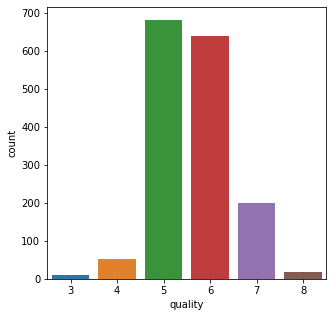

In [3]:
plt.figure(figsize=(5,5))
sns.countplot(df.quality)

There is class imblance in the count of quality

__BIVARIATE ANALYSIS

 comparison of a variables(fixed acidity,volatile acidity and citric acid) distribution with quality

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

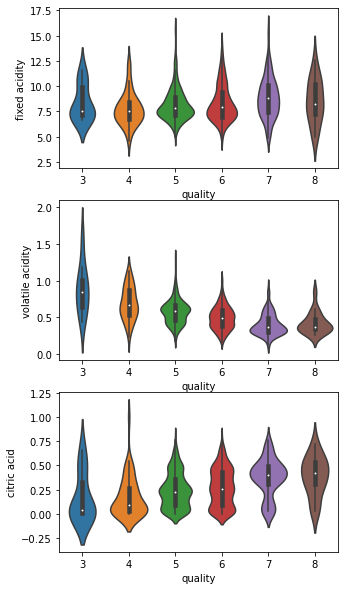

In [7]:
plt.figure(figsize=(5, 10))

colors = sns.color_palette()

rows = 3
cols = 1
i = 0

i += 1
plt.subplot(rows, cols, i)
sns.violinplot(data=df, x='quality', y='fixed acidity')

i += 1
plt.subplot(rows, cols, i)
sns.violinplot(data=df, x='quality', y='volatile acidity')
i += 1
plt.subplot(rows, cols, i)
sns.violinplot(data=df, x='quality', y='citric acid')

checking the influence of fixed acidity,volatile acidity and citric acid feature with quality .from the observation of the above voilin plots it clearly shown that volatile acidity feature having low impact on quality.citric acid and fixed acidity features having high impact on qualit

 ___comparison of a variables(free sulphur dioxide,total sulfur dioxide and residual sugar) distribution with quality

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

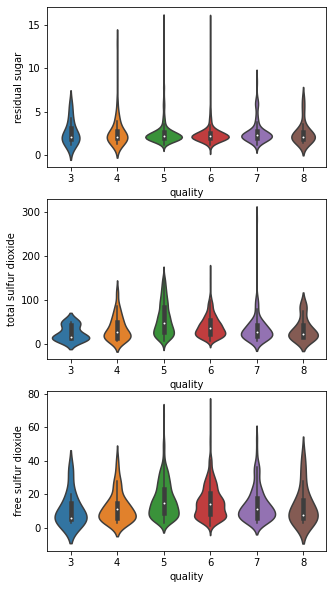

In [15]:
plt.figure(figsize=(5, 10))

colors = sns.color_palette()

rows = 3
cols = 1
i = 0

i += 1
plt.subplot(rows, cols, i)
sns.violinplot(data=df, x='quality',y='residual sugar')

i += 1
plt.subplot(rows, cols, i)
sns.violinplot(data=df,x='quality',y='total sulfur dioxide')
i += 1
plt.subplot(rows, cols, i)
sns.violinplot(data=df,x='quality',y='free sulfur dioxide')

checking the influence of free sulphur dioxide,total sulphur dioxide and residual feature with quality .from the observation of the above voilin plots it clearly shown that all are  having low impact on quality.free sulfur dioxide predicts only value of quality between 4 and 6

___comparison of a variables(chlorides,pH and density) distribution with quality

<AxesSubplot:xlabel='quality', ylabel='density'>

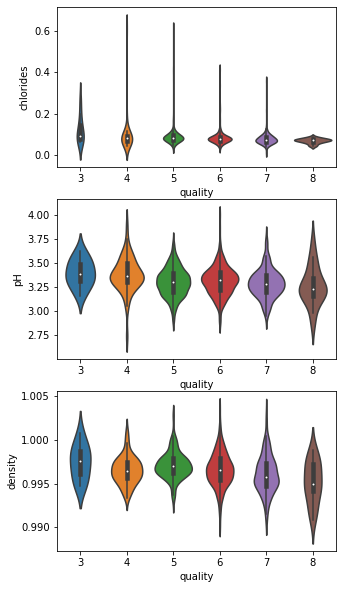

In [16]:
plt.figure(figsize=(5, 10))

colors = sns.color_palette()

rows = 3
cols = 1
i = 0

i += 1
plt.subplot(rows, cols, i)
sns.violinplot(data=df, x='quality', y='chlorides')

i += 1
plt.subplot(rows, cols, i)
sns.violinplot(data=df, x='quality', y='pH')
i += 1
plt.subplot(rows, cols, i)
sns.violinplot(data=df, x='quality', y='density')

checking the influence of chlorides,pH and density feature with quality .from the observation of the above voilin plots it clearly shown that density and ph are  having average impact on quality.chlorides has low impact on quality All the three features predicts maximum between 4 and 6  value of quality

___comparison of a variables(sulphates and alcohol) distribution with quality

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

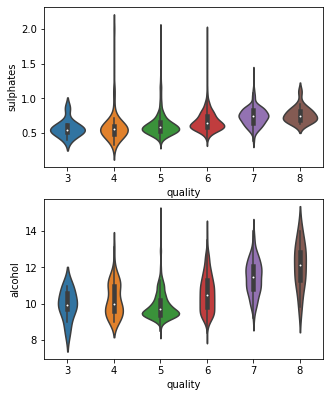

In [17]:
plt.figure(figsize=(5, 10))

colors = sns.color_palette()

rows = 3
cols = 1
i = 0

i += 1
plt.subplot(rows, cols, i)
sns.violinplot(data=df, x='quality', y='sulphates')

i += 1
plt.subplot(rows, cols, i)
sns.violinplot(data=df, x='quality', y='alcohol')


checking the influence of sulphates and alcohol feature with quality .from the observation of the above voilin plots it clearly shown that alcohol having high impact on quality.free sulphates predicts only value of quality between 4 and 6

<AxesSubplot:>

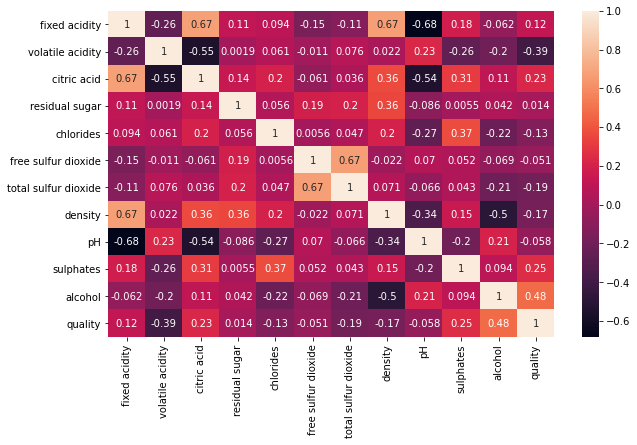

In [23]:
correlation=df.corr(method='pearson')
plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot=True)

As per the observation of heatmap the quality feature is highly correlated with alcohol,sulphates,citric acid.


the quality feature is highly negatively correlated with volatile acidity.the quality feature is least correltated with residual sugar

free sulphur dioxide and ph has almost no or less correlation with quality

__REMOVING OUTLIERS USING IQR

In [79]:
data_I=df

In [63]:
Q1=data_I.quantile(0.25)
Q3=data_I.quantile(0.75)
IQR=Q3-Q1
dataIQR=data[~((data_I<(Q1-1.5*IQR))| (data_I>(Q1+1.5*IQR))).any(axis=1)]

In [64]:
from sklearn import preprocessing 
unscaled=dataIQR.values
data_clean1 = preprocessing.MinMaxScaler().fit_transform(unscaled)

In [65]:
data_clean1.shape

(506, 11)

In [69]:
((1599-505)/1599)*100

68.41776110068794

68% data loss after using IQR TECHNIQUE.Its a heavy data loss so I'm going to try removing outlier using zscore

__REMOVING OUTLIERS USING ZSCORE

In [7]:
data=df

In [8]:
z = np.abs(zscore(data))
print(np.where(z > 3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [9]:
data1 = data[(z<3).all(axis=1)]
data1.shape

(1451, 12)

In [10]:
((1599-1451)/1599)*100

9.255784865540964

9.25% data loss after removing outlier using Zscore.It is acceptable

__DETECTING and REMOVING SKEWNESS

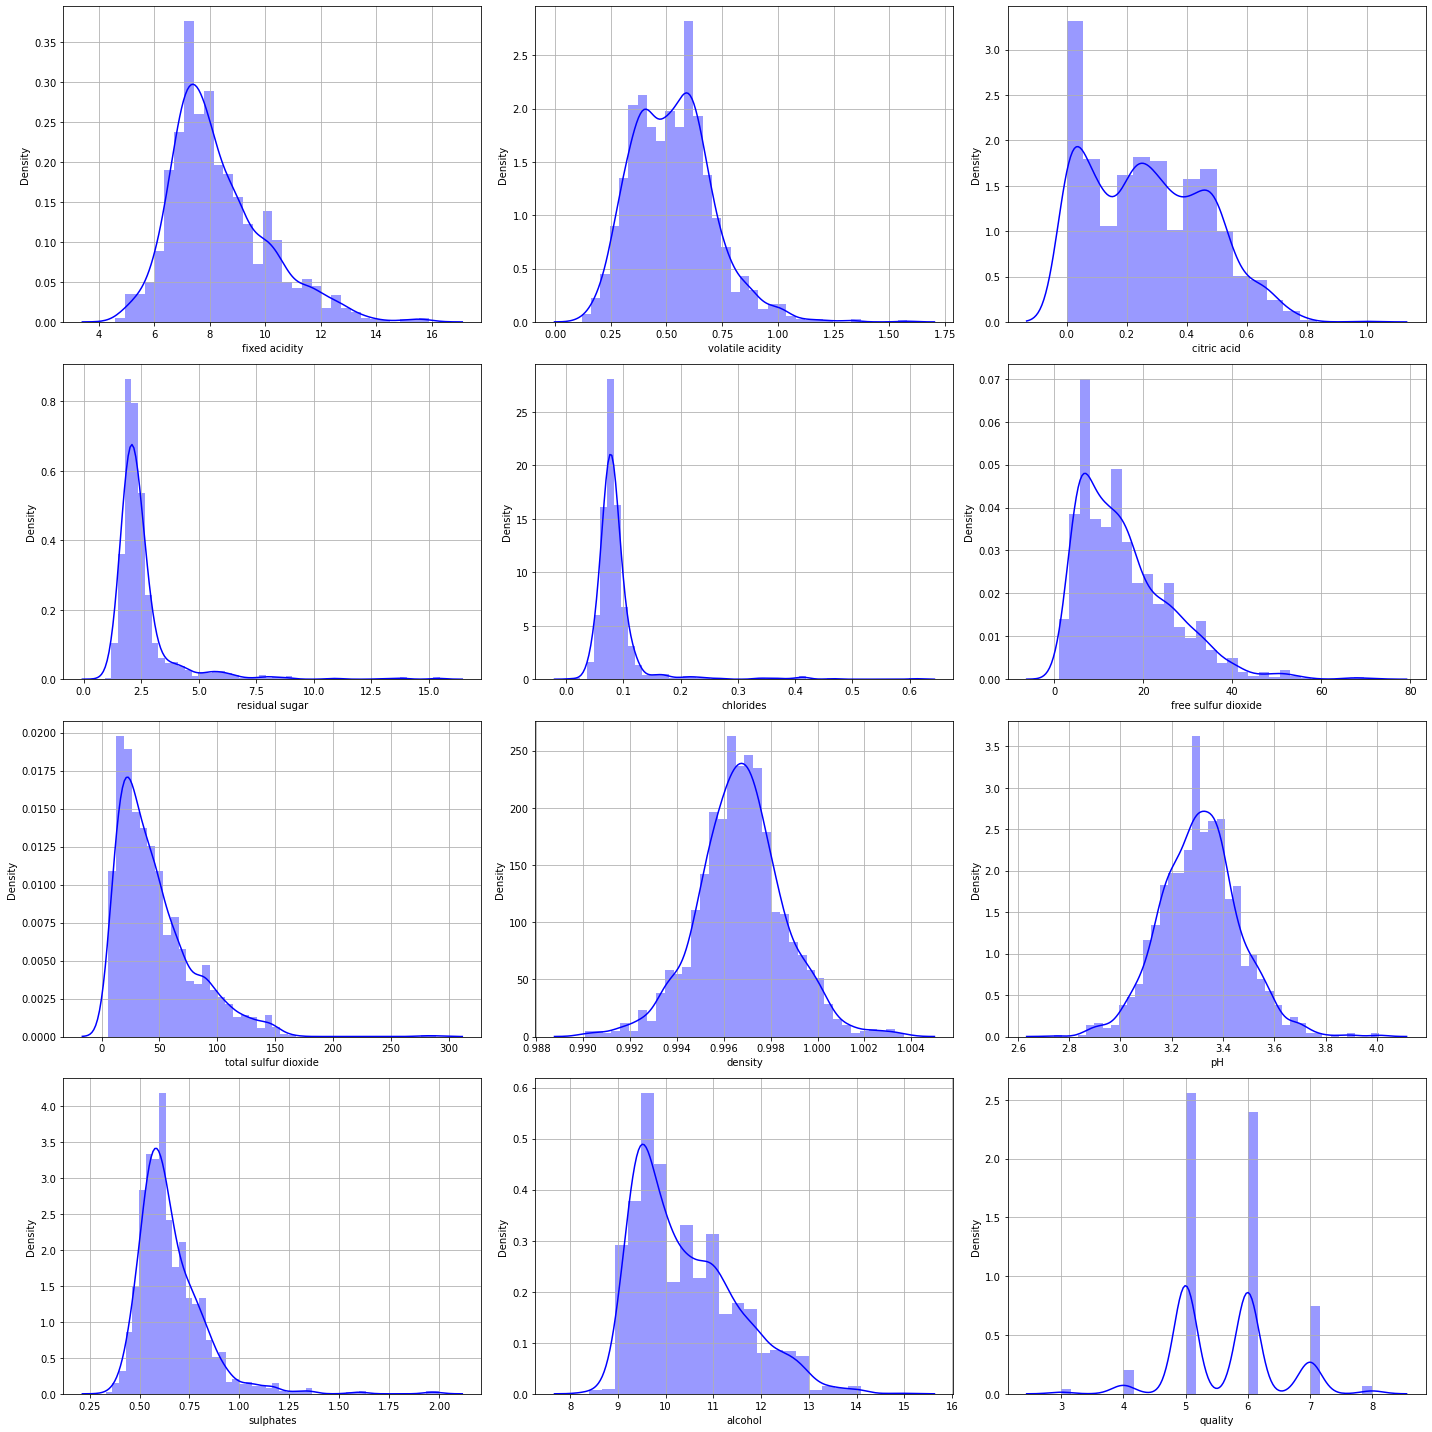

In [27]:
plt.figure(figsize=(20,20))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(4,3,i+1)
    sns.distplot(df[col],color='blue',kde=True)
    plt.grid()
    ##plt.legend(loc='upper right')
plt.tight_layout()

AS per visualization of dist plot of each feature its clearly shown that denisity and ph are distributed normally.Remaining features are positiveliy skewed

In [11]:
for col in enumerate(list(data1.columns.values)):
    print(col[1],"=",data1[col[1]].skew())

fixed acidity = 0.8239340241073351
volatile acidity = 0.3806591477316977
citric acid = 0.2912974107133157
residual sugar = 2.4561066979273734
chlorides = 2.275162469599226
free sulfur dioxide = 0.8692496707339011
total sulfur dioxide = 1.1831606095517972
density = 0.055737813135713146
pH = 0.11470451042972468
sulphates = 0.8914917203295141
alcohol = 0.7589584200759185
quality = 0.4078653928070539


'fixed acidity','residual sugar','chlorides','free sulphur dioxide','total sulphur dioxide','sulphates','alcohol' have skewness

In [12]:
data1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
data_s=['fixed acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates','alcohol']
for i in data_s:
    data1[i]=np.log1p(data1[i])
print("removed skewness")

removed skewness


In [18]:
for col in enumerate(list(data1.columns.values)):
    print(col[1],"=",data1[col[1]].skew())

fixed acidity = 0.24133209466243796
volatile acidity = 0.3806591477316977
citric acid = 0.2912974107133157
residual sugar = 0.9795223584301922
chlorides = 1.7545130497599692
free sulfur dioxide = -0.7487300999888348
total sulfur dioxide = -0.4701362612773556
density = 0.055737813135713146
pH = 0.11470451042972468
sulphates = 0.42662969029082787
alcohol = 0.5451214562519586
quality = 0.4078653928070539


In [17]:
data1.shape

(1451, 12)

In [19]:
data1['quality_level']=np.nan
data1.shape

(1451, 13)

In [20]:
data1['quality_level']=[1 if i >=6 else 0 for i in data1['quality']]
data1['quality_level'].value_counts()

1    787
0    664
Name: quality_level, dtype: int64

___adding one more coloumn as quality_level in that the quality sore greater than 6 encoded as 1 or good and remaining value as 0 or bad

<AxesSubplot:xlabel='quality_level', ylabel='count'>

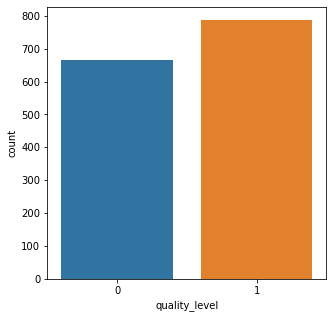

In [68]:
plt.figure(figsize=(5,5))
sns.countplot(data1.quality_level)

There is no class imbalance between  class 1(good) and class 0(bad)

In [21]:
x1=data1.drop('quality_level',axis=1)
y1=data1['quality_level']

_To scale the unscaled data ,I have used minmax scalar transmormation because min max scalar does not lose any data.if I use any other scalar like zscore it will lose some data which inturn decrease the accuracy

In [22]:
from sklearn import preprocessing 
unscaled=x1.values
data_clean = preprocessing.MinMaxScaler().fit_transform(unscaled)
data_clean.shape

(1451, 12)

__MODELING

Importing all classifer algorithm

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
x=data_clean
y=data1['quality_level']

__RandomForestClassifier

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.25)
rfc = RandomForestClassifier(random_state=1,n_estimators=10)
rfc.fit(x_train, y_train)
rfc.score(x_test,y_test)

1.0

In [24]:
y_pred_1 = rfc.predict(x_test)

In [25]:
result = confusion_matrix(y_test, y_pred_1)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred_1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred_1)
print("Accuracy:",result2)

Confusion Matrix:
[[164   0]
 [  0 199]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00       199

    accuracy                           1.00       363
   macro avg       1.00      1.00      1.00       363
weighted avg       1.00      1.00      1.00       363

Accuracy: 1.0


___KNeighborsClassifier

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.33)
knn= KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
knn.score(x_test,y_test)

0.9770354906054279

In [27]:
y_pred_1 = knn.predict(x_test)

In [28]:
result = confusion_matrix(y_test, y_pred_1)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred_1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred_1)
print("Accuracy:",result2)

Confusion Matrix:
[[219   6]
 [  5 249]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       225
           1       0.98      0.98      0.98       254

    accuracy                           0.98       479
   macro avg       0.98      0.98      0.98       479
weighted avg       0.98      0.98      0.98       479

Accuracy: 0.9770354906054279


___BaggingClassifier

In [209]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.33)
bag_knn=BaggingClassifier(KNeighborsClassifier(n_neighbors=7),n_estimators=100,
                          bootstrap=True,oob_score=True,random_state=1)
bag_knn.fit(x_train, y_train)
bag_knn.score(x_test,y_test)

0.964509394572025

In [210]:
y_pred_1 = bag_knn.predict(x_test)

In [211]:
result = confusion_matrix(y_test, y_pred_1)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred_1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred_1)
print("Accuracy:",result2)

Confusion Matrix:
[[207   6]
 [ 11 255]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       213
           1       0.98      0.96      0.97       266

    accuracy                           0.96       479
   macro avg       0.96      0.97      0.96       479
weighted avg       0.96      0.96      0.96       479

Accuracy: 0.964509394572025


__SVC

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.33)
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_test,y_test)

0.9979123173277662

In [256]:
y_pred_1 = svc.predict(x_test)

In [257]:
result = confusion_matrix(y_test, y_pred_1)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred_1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred_1)
print("Accuracy:",result2)

Confusion Matrix:
[[174   1]
 [  0 188]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       175
           1       0.99      1.00      1.00       188

    accuracy                           1.00       363
   macro avg       1.00      1.00      1.00       363
weighted avg       1.00      1.00      1.00       363

Accuracy: 0.9972451790633609


I have used 4 models knn,bagging knn,randomforest and svc accuracy knn=.9770354906054279, bagging_knn=.964509394572025 ,svc=0.9972451790633609 and Random forest=1.0 so I'm selecting RandomForest as best model based on accuracy after comparing with recall,f1-score,precision

__CROSS VALIDATION

In [ ]:
 To predict the performance of a model on unavailable data I have used cross validation

In [265]:
from sklearn.model_selection import cross_val_score
rf=RandomForestClassifier(random_state=7,n_estimators=10)
scores=cross_val_score(rf,x_train,y_train,cv=5)
scores

array([1., 1., 1., 1., 1.])

In [191]:
from sklearn.model_selection import cross_val_score
knr=KNeighborsClassifier()
scores=cross_val_score(knr,x_train,y_train,cv=5)
scores

array([0.96410256, 0.93333333, 0.95360825, 0.94845361, 0.98969072])

In [39]:
from sklearn.model_selection import cross_val_score
bag=BaggingClassifier(KNeighborsClassifier(n_neighbors=7),random_state=7,)
scores=cross_val_score(bag,x_train,y_train,cv=5)
scores

array([0.93846154, 0.98974359, 0.95360825, 0.95876289, 0.98969072])

In [42]:
from sklearn.model_selection import cross_val_score
svc1=SVC(kernel='poly')
scores=cross_val_score(svc1,x_train,y_train,cv=5)
scores

array([1., 1., 1., 1., 1.])

___To Avoid overfitting,bias I have found the difference between accuarcy of predicted modelfor known data and accuracy of pridicted model for unknown data(cross validation score)

 Difference of knn classifier (0.98969072-0.9686847599164927)*100 is 2.1005960083507302

Difference of Bagging classifier is (0.98969072-0.964509394572025)*100 is 2.518132542797502

 Difference of svc (1-0.9972451790633609)*100 is 0.27548209366391463

Difference of random forest classifier is 0

random forest classifier has zero difference so I selected random forest classifier as best model

__HYPER TUNING

In [ ]:
To find the best parameters of best model and improve the performance of the model

In [58]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
x=data_clean
y=data1['quality_level']
model = RandomForestClassifier()
n_estimators = [10, 100, 1000,100]
max_features = ['sqrt', 'log2']
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 1.000000 using {'max_features': 'sqrt', 'n_estimators': 10}


'max_features': 'sqrt', 'n_estimators': 10 are the best parameters

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.25)
model_rfc = RandomForestClassifier(max_features='sqrt', n_estimators=10)
model_rfc.fit(x_train, y_train)
model_rfc.score(x_test,y_test)

1.0

In [26]:
y_pred_1 = model_rfc.predict(x_test)

In [27]:
result = confusion_matrix(y_test, y_pred_1)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred_1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred_1)
print("Accuracy:",result2)

Confusion Matrix:
[[166   0]
 [  0 197]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       166
           1       1.00      1.00      1.00       197

    accuracy                           1.00       363
   macro avg       1.00      1.00      1.00       363
weighted avg       1.00      1.00      1.00       363

Accuracy: 1.0


 Random forest classifier and cross validation score has accuracy value,precision,recall and f1score are 100%. so the best model is random forest classifier
 
 
best params:'max_features': 'sqrt', 'n_estimators': 10
    

No Skill: ROC AUC=0.500
Logistic: ROC AUC=1.000


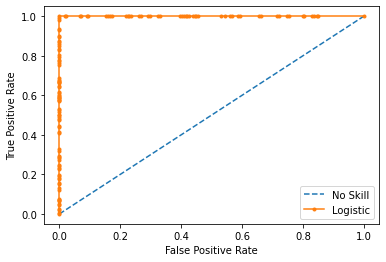

In [67]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
x=data_clean
y=data1['quality_level']
# split into train/test sets
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainx, trainy)
# predict probabilities
lr_probs = model.predict_proba(testx)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

___from roc auc curve its evident that the classifier is able to prefectly distinguish between all the positive and negative class points correctly

__SAVING THE MODEL

In [35]:
from joblib import dump
dump(model_rfc, 'model_redwine.joblib')

['model_redwine.joblib']

In [36]:
from joblib import load
loaded = load('model_redwine.joblib')